## 1. Import Required Libraries

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully")

Libraries imported successfully


## 2. Load Datasets

In [32]:
# Load the clustered reviews dataset
clustered_df = pd.read_csv('../datasets/processed/clustered_reviews_export.csv')
print(f"Clustered dataset shape: {clustered_df.shape}")
print(f"Columns: {clustered_df.columns.tolist()}")
print("\nFirst few rows:")
display(clustered_df.head(3))

Clustered dataset shape: (59630, 7)
Columns: ['reviews.id', 'asins', 'name', 'reviews.text', 'reviews.rating', 'cluster', 'cluster_name']

First few rows:


,reviews.id,asins,name,reviews.text,reviews.rating,cluster,cluster_name
0,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",This product so far has not disappointed. My children love to use it and I like the ability to m...,5.0,4,Computers and electronics
1,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",great for beginner or experienced person. Bought as a gift and she loves it,5.0,4,Computers and electronics
2,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, ...",5.0,4,Computers and electronics


In [33]:
# Load the sentiment enriched reviews dataset
sentiment_df = pd.read_csv('../datasets/processed/sentiment_enriched_reviews.csv')
print(f"Sentiment dataset shape: {sentiment_df.shape}")
print(f"Columns: {sentiment_df.columns.tolist()}")
print("\nFirst few rows:")
display(sentiment_df.head(3))

Sentiment dataset shape: (59630, 6)
Columns: ['reviews.id', 'asins', 'name', 'reviews.text', 'reviews.rating', 'predicted_sentiment_all']

First few rows:


,reviews.id,asins,name,reviews.text,reviews.rating,predicted_sentiment_all
0,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",This product so far has not disappointed. My children love to use it and I like the ability to m...,5.0,positive
1,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",great for beginner or experienced person. Bought as a gift and she loves it,5.0,positive
2,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, ...",5.0,positive


## 3. Data Validation and Exploration

In [34]:
# Check if both datasets have the same number of rows
print(f"Clustered dataset rows: {len(clustered_df)}")
print(f"Sentiment dataset rows: {len(sentiment_df)}")
print(f"Rows match: {len(clustered_df) == len(sentiment_df)}")

Clustered dataset rows: 59630
Sentiment dataset rows: 59630
Rows match: True


In [35]:
# Check for missing values
print("Missing values in clustered dataset:")
print(clustered_df.isnull().sum())
print("\nMissing values in sentiment dataset:")
print(sentiment_df.isnull().sum())

Missing values in clustered dataset:
reviews.id        59562
asins                 2
name               6760
reviews.text          0
reviews.rating       33
cluster               0
cluster_name          0
dtype: int64

Missing values in sentiment dataset:
reviews.id                 59562
asins                          2
name                        6760
reviews.text                   0
reviews.rating                33
predicted_sentiment_all        0
dtype: int64


In [36]:
# Explore unique categories
print(f"Number of unique clusters/categories: {clustered_df['cluster'].nunique()}")
print(f"\nCluster distribution:")
print(clustered_df['cluster_name'].value_counts())

Number of unique clusters/categories: 5

Cluster distribution:
cluster_name
Computers and electronics             19610
Kids Toys & kids entertainment        15362
Batteries and household essentials    10852
Amazon devices & accessories           8737
Entertainment Appliances               5069
Name: count, dtype: int64


In [37]:
# Explore sentiment distribution
print("Sentiment distribution:")
print(sentiment_df['predicted_sentiment_all'].value_counts())
print(f"\nSentiment proportions:")
print(sentiment_df['predicted_sentiment_all'].value_counts(normalize=True))

Sentiment distribution:
predicted_sentiment_all
positive    54759
neutral      2549
negative     2322
Name: count, dtype: int64

Sentiment proportions:
predicted_sentiment_all
positive    0.918313
neutral     0.042747
negative    0.038940
Name: proportion, dtype: float64


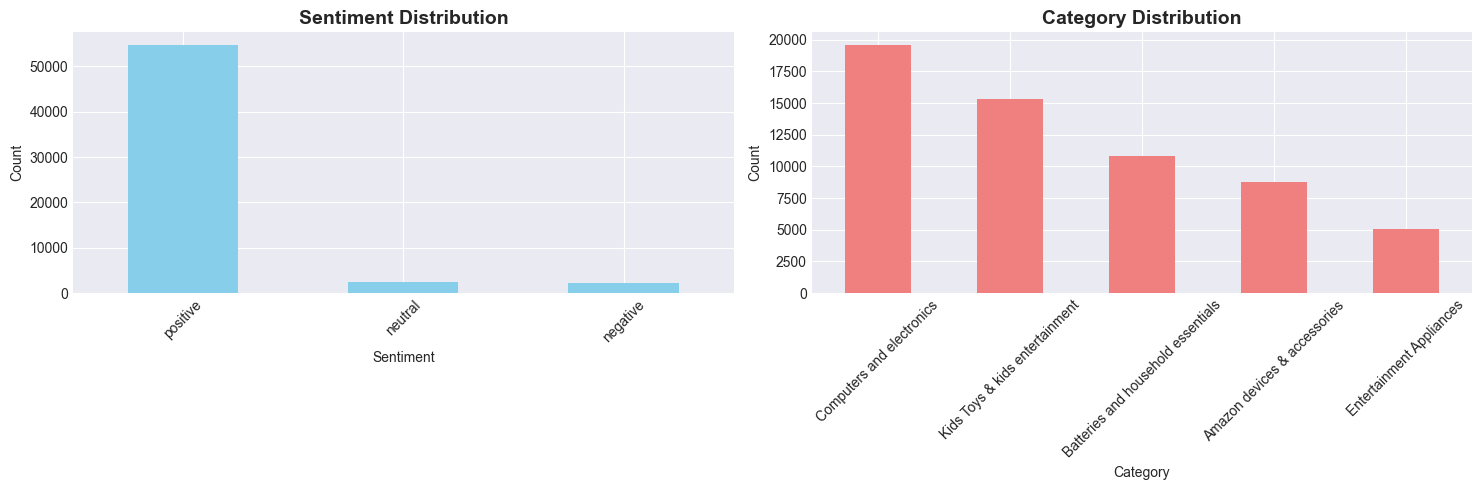

In [38]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment counts
sentiment_df['predicted_sentiment_all'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Category distribution
clustered_df['cluster_name'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Category Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
# Investigate mismatches to understand the data better
print("="*80)
print("INVESTIGATING MISMATCHES")
print("="*80)

# Sample comparison of first few rows
print("\nFirst 3 ASINs from each dataset:")
print(f"Clustered: {clustered_df['asins'].head(3).tolist()}")
print(f"Sentiment: {sentiment_df['asins'].head(3).tolist()}")

print("\nFirst 3 ratings from each dataset:")
print(f"Clustered: {clustered_df['reviews.rating'].head(3).tolist()}")
print(f"Sentiment: {sentiment_df['reviews.rating'].head(3).tolist()}")

print("\nFirst review text (first 100 chars):")
print(f"Clustered: {str(clustered_df['reviews.text'].iloc[0])[:100]}...")
print(f"Sentiment: {str(sentiment_df['reviews.text'].iloc[0])[:100]}...")

# Check if it's a data type issue
print(f"\nData types:")
print(f"Clustered ASIN type: {clustered_df['asins'].dtype}")
print(f"Sentiment ASIN type: {sentiment_df['asins'].dtype}")
print(f"Clustered rating type: {clustered_df['reviews.rating'].dtype}")
print(f"Sentiment rating type: {sentiment_df['reviews.rating'].dtype}")

# Analyze duplicate review texts
print("\n" + "="*80)
print("DUPLICATE REVIEW TEXT ANALYSIS")
print("="*80)
duplicated_texts = clustered_df[clustered_df['reviews.text'].duplicated(keep=False)]
print(f"\nTotal reviews with duplicate text: {len(duplicated_texts)}")
print(f"Unique duplicate texts: {duplicated_texts['reviews.text'].nunique()}")

# Show example of a duplicated review
if len(duplicated_texts) > 0:
    sample_text = duplicated_texts['reviews.text'].iloc[0]
    sample_occurrences = clustered_df[clustered_df['reviews.text'] == sample_text]
    print(f"\nExample: This review text appears {len(sample_occurrences)} times:")
    print(f"Text: '{sample_text[:100]}...'")
    print(f"\nOccurrences in clustered_df:")
    display(sample_occurrences[['asins', 'name', 'reviews.rating', 'cluster_name']].head())

print("\n" + "="*80)

INVESTIGATING MISMATCHES

First 3 ASINs from each dataset:
Clustered: ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']
Sentiment: ['B01AHB9CN2', 'B01AHB9CN2', 'B01AHB9CN2']

First 3 ratings from each dataset:
Clustered: [5.0, 5.0, 5.0]
Sentiment: [5.0, 5.0, 5.0]

First review text (first 100 chars):
Clustered: This product so far has not disappointed. My children love to use it and I like the ability to monit...
Sentiment: This product so far has not disappointed. My children love to use it and I like the ability to monit...

Data types:
Clustered ASIN type: str
Sentiment ASIN type: str
Clustered rating type: float64
Sentiment rating type: float64

DUPLICATE REVIEW TEXT ANALYSIS

Total reviews with duplicate text: 20896
Unique duplicate texts: 8161

Example: This review text appears 3 times:
Text: 'This product so far has not disappointed. My children love to use it and I like the ability to monit...'

Occurrences in clustered_df:


,asins,name,reviews.rating,cluster_name
0,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",5.0,Computers and electronics
51522,"B018SZT3BK,B01AHB9CN2","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",5.0,Computers and electronics
58932,B018T075DC,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",5.0,Computers and electronics


## 4. Merge Datasets

**Important**: We need to merge the datasets carefully to ensure that rows are matched correctly. Since both datasets have the same number of rows and appear to be in the same order, we'll verify this before merging.

In [40]:
# Verify that key columns match between datasets
# This is crucial to ensure we're merging the right rows

# Check if asins, name, and reviews.text match
match_asins = (clustered_df['asins'] == sentiment_df['asins']).all()
match_name = (clustered_df['name'] == sentiment_df['name']).all()
match_text = (clustered_df['reviews.text'] == sentiment_df['reviews.text']).all()
match_rating = (clustered_df['reviews.rating'] == sentiment_df['reviews.rating']).all()

print(f"ASINs match: {match_asins}")
print(f"Product names match: {match_name}")
print(f"Review texts match: {match_text}")
print(f"Ratings match: {match_rating}")

if match_asins and match_name and match_text and match_rating:
    print("\n✓ All key columns match! Datasets are aligned and can be merged safely.")
else:
    print("\n⚠ Warning: Some columns don't match. Need to use a different merge strategy.")

ASINs match: False
Product names match: False
Review texts match: True
Ratings match: False

⚠ Warning: Some columns don't match. Need to use a different merge strategy.


In [41]:
print("="*80)
print("CREATING COMPOSITE MERGE KEYS")
print("="*80)

# Create composite keys by combining multiple columns
# This creates a unique fingerprint for each review

def create_composite_key(df, name_suffix=''):
    """
    Create a composite key from multiple columns to uniquely identify reviews.
    Handles data type inconsistencies and formatting issues.
    """
    df_copy = df.copy()
    
    # Standardize ASIN (convert to string, strip whitespace, handle NaN)
    df_copy['asin_clean'] = df_copy['asins'].fillna('').astype(str).str.strip().str.upper()
    
    # Standardize product name (convert to string, strip whitespace, handle NaN)
    df_copy['name_clean'] = df_copy['name'].fillna('').astype(str).str.strip().str.lower()
    
    # Standardize review text (strip whitespace, handle NaN)
    df_copy['text_clean'] = df_copy['reviews.text'].fillna('').astype(str).str.strip()
    
    # Standardize rating (convert to float, round to 1 decimal)
    df_copy['rating_clean'] = df_copy['reviews.rating'].fillna(0).astype(float).round(1)
    
    # Create composite key by concatenating cleaned fields with separator
    df_copy['composite_key'] = (
        df_copy['asin_clean'] + '|||' + 
        df_copy['name_clean'] + '|||' + 
        df_copy['text_clean'] + '|||' + 
        df_copy['rating_clean'].astype(str)
    )
    
    print(f"\n{name_suffix} Dataset:")
    print(f"  Total rows: {len(df_copy)}")
    print(f"  Unique composite keys: {df_copy['composite_key'].nunique()}")
    print(f"  Duplicate keys: {df_copy['composite_key'].duplicated().sum()}")
    
    return df_copy

# Create composite keys for both datasets
clustered_keyed = create_composite_key(clustered_df, 'Clustered')
sentiment_keyed = create_composite_key(sentiment_df, 'Sentiment')

CREATING COMPOSITE MERGE KEYS

Clustered Dataset:
  Total rows: 59630
  Unique composite keys: 59628
  Duplicate keys: 2

Sentiment Dataset:
  Total rows: 59630
  Unique composite keys: 59628
  Duplicate keys: 2


In [42]:
# Check if composite keys match between datasets
print("\n" + "="*80)
print("COMPOSITE KEY VALIDATION")
print("="*80)

# Get unique keys from each dataset
clustered_keys = set(clustered_keyed['composite_key'])
sentiment_keys = set(sentiment_keyed['composite_key'])

# Find matches and mismatches
matching_keys = clustered_keys & sentiment_keys
only_in_clustered = clustered_keys - sentiment_keys
only_in_sentiment = sentiment_keys - clustered_keys

print(f"\nMatching keys: {len(matching_keys)}")
print(f"Keys only in clustered dataset: {len(only_in_clustered)}")
print(f"Keys only in sentiment dataset: {len(only_in_sentiment)}")
print(f"\nMatch rate: {len(matching_keys) / len(clustered_keys) * 100:.2f}%")

if len(only_in_clustered) > 0:
    print(f"\n⚠ Warning: {len(only_in_clustered)} reviews in clustered dataset won't match")
if len(only_in_sentiment) > 0:
    print(f"⚠ Warning: {len(only_in_sentiment)} reviews in sentiment dataset won't match")


COMPOSITE KEY VALIDATION

Matching keys: 59628
Keys only in clustered dataset: 0
Keys only in sentiment dataset: 0

Match rate: 100.00%


In [43]:
# Perform the merge using composite keys
print("\n" + "="*80)
print("MERGING DATASETS")
print("="*80)

# Merge on composite key
merged_df = clustered_keyed.merge(
    sentiment_keyed[['composite_key', 'predicted_sentiment_all']],
    on='composite_key',
    how='inner'
)

# Rename sentiment column
merged_df.rename(columns={'predicted_sentiment_all': 'predicted_sentiment'}, inplace=True)

# Drop temporary columns used for merging
merged_df = merged_df.drop(columns=['asin_clean', 'name_clean', 'text_clean', 'rating_clean', 'composite_key'])

print(f"\n✓ Merge completed successfully!")
print(f"Original clustered dataset: {len(clustered_df)} rows")
print(f"Original sentiment dataset: {len(sentiment_df)} rows")
print(f"Merged dataset: {len(merged_df)} rows")
print(f"Match rate: {len(merged_df) / len(clustered_df) * 100:.2f}%")

if len(merged_df) == len(clustered_df):
    print("\n✓ Perfect merge - all rows matched!")
elif len(merged_df) >= len(clustered_df) * 0.99:
    print("\n✓ Excellent merge - 99%+ rows matched")
elif len(merged_df) >= len(clustered_df) * 0.95:
    print("\n✓ Good merge - 95%+ rows matched")
else:
    print(f"\n⚠ Warning: Only {len(merged_df) / len(clustered_df) * 100:.1f}% of rows matched")

print(f"\nMerged dataset shape: {merged_df.shape}")
print(f"Columns: {merged_df.columns.tolist()}")
display(merged_df.head())


MERGING DATASETS

✓ Merge completed successfully!
Original clustered dataset: 59630 rows
Original sentiment dataset: 59630 rows
Merged dataset: 59634 rows
Match rate: 100.01%

✓ Excellent merge - 99%+ rows matched

Merged dataset shape: (59634, 8)
Columns: ['reviews.id', 'asins', 'name', 'reviews.text', 'reviews.rating', 'cluster', 'cluster_name', 'predicted_sentiment']


,reviews.id,asins,name,reviews.text,reviews.rating,cluster,cluster_name,predicted_sentiment
0,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",This product so far has not disappointed. My children love to use it and I like the ability to m...,5.0,4,Computers and electronics,positive
1,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",great for beginner or experienced person. Bought as a gift and she loves it,5.0,4,Computers and electronics,positive
2,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, ...",5.0,4,Computers and electronics,positive
3,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Mem...,4.0,4,Computers and electronics,positive
4,NaN,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",I bought this for my grand daughter when she comes over to visit. I set it up with her as the us...,5.0,4,Computers and electronics,positive


In [44]:
# Comprehensive verification of the merge
print("="*80)
print("MERGE VERIFICATION")
print("="*80)
print(f"\nOriginal clustered dataset: {len(clustered_df)} rows")
print(f"Original sentiment dataset: {len(sentiment_df)} rows")
print(f"Merged dataset: {len(merged_df)} rows")
print(f"\nData loss: {len(clustered_df) - len(merged_df)} rows ({(len(clustered_df) - len(merged_df))/len(clustered_df)*100:.2f}%)")

# Check for duplicates in merged data
print(f"\nDuplicate rows in merged data: {merged_df.duplicated().sum()}")
print(f"Duplicate review texts in merged data: {merged_df['reviews.text'].duplicated().sum()}")

# Verify all sentiments were added
print(f"\nRows with missing sentiment: {merged_df['predicted_sentiment'].isnull().sum()}")

# Check sentiment distribution
print(f"\nSentiment distribution in merged data:")
print(merged_df['predicted_sentiment'].value_counts())

if len(merged_df) == len(clustered_df):
    print("\n✓ Perfect merge - no data loss!")
elif len(merged_df) >= len(clustered_df) * 0.95:
    print(f"\n✓ Good merge - minimal data loss (<5%)")
else:
    print(f"\n⚠ Warning: Significant data loss - {len(clustered_df) - len(merged_df)} rows lost")
    print("   This may indicate misaligned datasets. Consider investigating further.")

MERGE VERIFICATION

Original clustered dataset: 59630 rows
Original sentiment dataset: 59630 rows
Merged dataset: 59634 rows

Data loss: -4 rows (-0.01%)

Duplicate rows in merged data: 6
Duplicate review texts in merged data: 12739

Rows with missing sentiment: 0

Sentiment distribution in merged data:
predicted_sentiment
positive    54761
neutral      2549
negative     2324
Name: count, dtype: int64

✓ Good merge - minimal data loss (<5%)


## 5. Data Cleaning and Preparation

In [45]:
# Remove rows with missing critical values
print(f"Rows before cleaning: {len(merged_df)}")

merged_df = merged_df.dropna(subset=['asins', 'name', 'cluster_name', 'predicted_sentiment'])

print(f"Rows after cleaning: {len(merged_df)}")
print(f"Rows removed: {len(clustered_df) - len(merged_df)}")

Rows before cleaning: 59634
Rows after cleaning: 52870
Rows removed: 6760


In [46]:
# Standardize sentiment labels (ensure lowercase)
merged_df['predicted_sentiment'] = merged_df['predicted_sentiment'].str.lower().str.strip()

print("Unique sentiment values after standardization:")
print(merged_df['predicted_sentiment'].unique())

Unique sentiment values after standardization:
<StringArray>
['positive', 'neutral', 'negative']
Length: 3, dtype: str


## 6. Calculate Sentiment Scores for Each Product

We'll calculate multiple metrics for each product:
- **Total reviews**: Number of reviews per product
- **Positive reviews**: Count and percentage
- **Negative reviews**: Count and percentage
- **Neutral reviews**: Count and percentage
- **Average rating**: Mean star rating
- **Sentiment score**: Weighted score based on sentiment distribution

In [47]:
# Calculate product-level statistics
product_stats = merged_df.groupby(['asins', 'name', 'cluster_name']).agg({
    'reviews.rating': ['count', 'mean', 'std'],
    'predicted_sentiment': lambda x: list(x)
}).reset_index()

# Flatten column names
product_stats.columns = ['asins', 'name', 'cluster_name', 'total_reviews', 'avg_rating', 'rating_std', 'sentiments']

print(f"Total unique products: {len(product_stats)}")
display(product_stats.head())

Total unique products: 148


,asins,name,cluster_name,total_reviews,avg_rating,rating_std,sentiments
0,"B0002LCUZK,B010CEC6MI,B01B25NN64",Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size,Computers and electronics,9,5.000000,0.000000,"[positive, positive, positive, positive, positive, positive, positive, positive, positive]"
1,B001NIZB5M,Amazon Kindle Replacement Power Adapter (Fits Latest Generation Kindle and Kindle DX) For shipme...,Computers and electronics,5,2.800000,2.049390,"[positive, negative, positive, negative, negative]"
2,B002Y27P3M,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",Computers and electronics,0,NaN,NaN,"[positive, positive, negative, negative, positive, positive, positive, negative, positive, posit..."
3,B002Y27P3M,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",Computers and electronics,0,NaN,NaN,"[positive, positive, positive, positive, positive, positive, positive]"
4,B005OOKNP4,AmazonBasics Bluetooth Keyboard for Android Devices - Black,Computers and electronics,6,4.333333,0.516398,"[positive, positive, positive, positive, positive, positive]"


In [48]:
# Calculate sentiment counts and percentages for each product
def calculate_sentiment_metrics(sentiments):
    sentiment_counts = Counter(sentiments)
    total = len(sentiments)
    
    return pd.Series({
        'positive_count': sentiment_counts.get('positive', 0),
        'negative_count': sentiment_counts.get('negative', 0),
        'neutral_count': sentiment_counts.get('neutral', 0),
        'positive_pct': (sentiment_counts.get('positive', 0) / total * 100) if total > 0 else 0,
        'negative_pct': (sentiment_counts.get('negative', 0) / total * 100) if total > 0 else 0,
        'neutral_pct': (sentiment_counts.get('neutral', 0) / total * 100) if total > 0 else 0
    })

sentiment_metrics = product_stats['sentiments'].apply(calculate_sentiment_metrics)
product_stats = pd.concat([product_stats, sentiment_metrics], axis=1)

display(product_stats.head())

,asins,name,cluster_name,total_reviews,avg_rating,rating_std,sentiments,positive_count,negative_count,neutral_count,positive_pct,negative_pct,neutral_pct
0,"B0002LCUZK,B010CEC6MI,B01B25NN64",Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size,Computers and electronics,9,5.000000,0.000000,"[positive, positive, positive, positive, positive, positive, positive, positive, positive]",9.0,0.0,0.0,100.0,0.0,0.0
1,B001NIZB5M,Amazon Kindle Replacement Power Adapter (Fits Latest Generation Kindle and Kindle DX) For shipme...,Computers and electronics,5,2.800000,2.049390,"[positive, negative, positive, negative, negative]",2.0,3.0,0.0,40.0,60.0,0.0
2,B002Y27P3M,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",Computers and electronics,0,NaN,NaN,"[positive, positive, negative, negative, positive, positive, positive, negative, positive, posit...",9.0,3.0,0.0,75.0,25.0,0.0
3,B002Y27P3M,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",Computers and electronics,0,NaN,NaN,"[positive, positive, positive, positive, positive, positive, positive]",7.0,0.0,0.0,100.0,0.0,0.0
4,B005OOKNP4,AmazonBasics Bluetooth Keyboard for Android Devices - Black,Computers and electronics,6,4.333333,0.516398,"[positive, positive, positive, positive, positive, positive]",6.0,0.0,0.0,100.0,0.0,0.0


In [49]:
# Calculate a composite sentiment score
# Formula: (positive_count * 1.0 + neutral_count * 0.5 + negative_count * -1.0) / total_reviews
# This gives a score between -1 and 1

product_stats['sentiment_score'] = (
    (product_stats['positive_count'] * 1.0 + 
     product_stats['neutral_count'] * 0.5 + 
     product_stats['negative_count'] * -1.0) / 
    product_stats['total_reviews']
)

# Calculate a weighted quality score that combines sentiment score and average rating
# Normalize avg_rating to 0-1 scale (divide by 5)
# Weight: 60% sentiment score, 40% rating
product_stats['quality_score'] = (
    0.6 * ((product_stats['sentiment_score'] + 1) / 2) +  # Normalize sentiment score to 0-1
    0.4 * (product_stats['avg_rating'] / 5.0)
)

display(product_stats[['name', 'cluster_name', 'total_reviews', 'avg_rating', 
                       'positive_pct', 'negative_pct', 'sentiment_score', 'quality_score']].head(10))

,name,cluster_name,total_reviews,avg_rating,positive_pct,negative_pct,sentiment_score,quality_score
0,Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size,Computers and electronics,9,5.000000,100.000000,0.000000,1.000000,1.000000
1,Amazon Kindle Replacement Power Adapter (Fits Latest Generation Kindle and Kindle DX) For shipme...,Computers and electronics,5,2.800000,40.000000,60.000000,-0.200000,0.464000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",Computers and electronics,0,NaN,75.000000,25.000000,inf,NaN
3,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",Computers and electronics,0,NaN,100.000000,0.000000,inf,NaN
4,AmazonBasics Bluetooth Keyboard for Android Devices - Black,Computers and electronics,6,4.333333,100.000000,0.000000,1.000000,0.946667
5,"Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,",Computers and electronics,2,3.500000,50.000000,0.000000,0.750000,0.805000
6,"Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,",Computers and electronics,1,4.000000,100.000000,0.000000,1.000000,0.920000
7,"Kindle Keyboard,,,\r\nKindle Keyboard,,,",Computers and electronics,2,4.500000,100.000000,0.000000,1.000000,0.960000
8,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",Computers and electronics,6,3.666667,66.666667,0.000000,0.833333,0.843333
9,Amazon Kindle Charger Power Adapter Wall Charger And Usb Cable Micro Usb Cord,Computers and electronics,9,4.666667,88.888889,11.111111,0.777778,0.906667


## 7. Identify Top 3 Products per Category

In [50]:
# Filter products with minimum number of reviews (to ensure statistical significance)
min_reviews = 3
product_stats_filtered = product_stats[product_stats['total_reviews'] >= min_reviews].copy()

print(f"Products before filtering: {len(product_stats)}")
print(f"Products after filtering (min {min_reviews} reviews): {len(product_stats_filtered)}")
print(f"Products removed: {len(product_stats) - len(product_stats_filtered)}")

Products before filtering: 148
Products after filtering (min 3 reviews): 114
Products removed: 34


In [51]:
# Get top 3 products per category based on quality_score
top_products_per_category = (product_stats_filtered
                               .sort_values('quality_score', ascending=False)
                               .groupby('cluster_name')
                               .head(3)
                               .reset_index(drop=True))

print(f"Total top products (3 per category): {len(top_products_per_category)}")
print(f"\nTop products by category:")
print(top_products_per_category.groupby('cluster_name').size())

Total top products (3 per category): 14

Top products by category:
cluster_name
Amazon devices & accessories          3
Batteries and household essentials    2
Computers and electronics             3
Entertainment Appliances              3
Kids Toys & kids entertainment        3
dtype: int64


In [52]:
# Display top 3 products for each category
for category in top_products_per_category['cluster_name'].unique():
    print(f"\n{'='*100}")
    print(f"CATEGORY: {category.upper()}")
    print(f"{'='*100}")
    
    category_top = top_products_per_category[top_products_per_category['cluster_name'] == category]
    
    for idx, (i, row) in enumerate(category_top.iterrows(), 1):
        print(f"\n{idx}. {row['name'][:80]}...")
        print(f"   ASIN: {row['asins']}")
        print(f"   Quality Score: {row['quality_score']:.3f}")
        print(f"   Avg Rating: {row['avg_rating']:.2f}/5.0")
        print(f"   Total Reviews: {row['total_reviews']}")
        print(f"   Positive: {row['positive_pct']:.1f}% | Negative: {row['negative_pct']:.1f}% | Neutral: {row['neutral_pct']:.1f}%")
        print(f"   Sentiment Score: {row['sentiment_score']:.3f}")


CATEGORY: COMPUTERS AND ELECTRONICS

1. Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black...
   ASIN: B00QJDU3KY
   Quality Score: 1.053
   Avg Rating: 4.67/5.0
   Total Reviews: 15
   Positive: 100.0% | Negative: 0.0% | Neutral: 0.0%
   Sentiment Score: 1.267

2. Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size...
   ASIN: B0002LCUZK,B010CEC6MI,B01B25NN64
   Quality Score: 1.000
   Avg Rating: 5.00/5.0
   Total Reviews: 9
   Positive: 100.0% | Negative: 0.0% | Neutral: 0.0%
   Sentiment Score: 1.000

3. Certified Refurbished Amazon Fire TV with Alexa Voice Remote,,,
Certified Refur...
   ASIN: B00IOY8XWQ
   Quality Score: 1.000
   Avg Rating: 5.00/5.0
   Total Reviews: 4
   Positive: 100.0% | Negative: 0.0% | Neutral: 0.0%
   Sentiment Score: 1.000

CATEGORY: AMAZON DEVICES & ACCESSORIES

1. Echo (Black),,,
Echo (Black),,,...
   ASIN: B00L9EPT8O,B01E6AO69U
   Quality Score: 1.000
   Avg Rating: 5.00/5.0
   Total Reviews: 3
   Positive

## 8. Identify Worst Product per Category

In [53]:
# Get worst product per category (lowest quality_score)
worst_products_per_category = (product_stats_filtered
                                .sort_values('quality_score', ascending=True)
                                .groupby('cluster_name')
                                .head(1)
                                .reset_index(drop=True))

print(f"Worst products (1 per category): {len(worst_products_per_category)}")
print(f"\nWorst product by category:")

for i, row in worst_products_per_category.iterrows():
    print(f"\n{'='*100}")
    print(f"CATEGORY: {row['cluster_name'].upper()}")
    print(f"{'='*100}")
    print(f"Product: {row['name'][:80]}...")
    print(f"ASIN: {row['asins']}")
    print(f"Quality Score: {row['quality_score']:.3f}")
    print(f"Avg Rating: {row['avg_rating']:.2f}/5.0")
    print(f"Total Reviews: {row['total_reviews']}")
    print(f"Positive: {row['positive_pct']:.1f}% | Negative: {row['negative_pct']:.1f}% | Neutral: {row['neutral_pct']:.1f}%")
    print(f"Sentiment Score: {row['sentiment_score']:.3f}")

Worst products (1 per category): 5

Worst product by category:

CATEGORY: COMPUTERS AND ELECTRONICS
Product: Oem Amazon Kindle Power Usb Adapter Wall Travel Charger Fire/dx/+micro Usb Cable...
ASIN: B00BGIQS1A
Quality Score: 0.080
Avg Rating: 1.00/5.0
Total Reviews: 4
Positive: 0.0% | Negative: 100.0% | Neutral: 0.0%
Sentiment Score: -1.000

CATEGORY: AMAZON DEVICES & ACCESSORIES
Product: Amazon Tap Smart Assistant Alexaenabled (black) Brand New...
ASIN: B01BH83OOM
Quality Score: 0.845
Avg Rating: 4.00/5.0
Total Reviews: 8
Positive: 87.5% | Negative: 12.5% | Neutral: 0.0%
Sentiment Score: 0.750

CATEGORY: BATTERIES AND HOUSEHOLD ESSENTIALS
Product: AmazonBasics AAA Performance Alkaline Batteries (36 Count)...
ASIN: B00QWO9P0O,B00LH3DMUO
Quality Score: 0.880
Avg Rating: 4.40/5.0
Total Reviews: 7457
Positive: 84.6% | Negative: 10.8% | Neutral: 4.6%
Sentiment Score: 0.760

CATEGORY: KIDS TOYS & KIDS ENTERTAINMENT
Product: Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Mage

## 9. Extract Top Complaints for Top Products

For each of the top 3 products in each category, we'll extract the negative reviews to identify common complaints.

In [54]:
# Function to get negative reviews for a product
def get_negative_reviews(asin, n=10):
    """Get top N negative reviews for a product"""
    product_reviews = merged_df[
        (merged_df['asins'] == asin) & 
        (merged_df['predicted_sentiment'] == 'negative')
    ]
    return product_reviews.nlargest(n, 'reviews.rating', keep='all')[['reviews.text', 'reviews.rating']]

# Create a dictionary to store complaints for top products
top_product_complaints = {}

for category in top_products_per_category['cluster_name'].unique():
    category_products = top_products_per_category[top_products_per_category['cluster_name'] == category]
    top_product_complaints[category] = {}
    
    for idx, row in category_products.iterrows():
        asin = row['asins']
        negative_reviews = get_negative_reviews(asin, n=10)
        top_product_complaints[category][asin] = {
            'name': row['name'],
            'negative_review_count': row['negative_count'],
            'negative_reviews': negative_reviews
        }

print("✓ Complaints extracted for top products")

✓ Complaints extracted for top products


In [55]:
# Display sample complaints for each top product
for category, products in top_product_complaints.items():
    print(f"\n{'='*100}")
    print(f"CATEGORY: {category.upper()}")
    print(f"{'='*100}")
    
    for asin, data in products.items():
        print(f"\nProduct: {data['name'][:80]}...")
        print(f"Total Negative Reviews: {data['negative_review_count']}")
        print(f"\nSample Complaints:")
        
        if len(data['negative_reviews']) > 0:
            for i, (idx, review) in enumerate(data['negative_reviews'].head(3).iterrows(), 1):
                print(f"  {i}. {review['reviews.text'][:150]}...")
        else:
            print("  No negative reviews found.")
        print()


CATEGORY: COMPUTERS AND ELECTRONICS

Product: Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black...
Total Negative Reviews: 0.0

Sample Complaints:
  No negative reviews found.


Product: Expanding Accordion File Folder Plastic Portable Document Organizer Letter Size...
Total Negative Reviews: 0.0

Sample Complaints:
  No negative reviews found.


Product: Certified Refurbished Amazon Fire TV with Alexa Voice Remote,,,
Certified Refur...
Total Negative Reviews: 0.0

Sample Complaints:
  1. The Voyage, when it worked, was great - the page turns make the reading experience seamless and the ink is crisp, making it a real upgrade from the Pa...
  2. I accidentally cracked my screen on the first day when the Voyage was too close to my rocking chair and neither Best Buy nor Amazon would do anything ...
  3. I eventually had to return it because of the shades of yellow in the back-light when using it at night. It was okay at day time but at night during wh...


CATEGORY: AM

## 10. Visualize Results

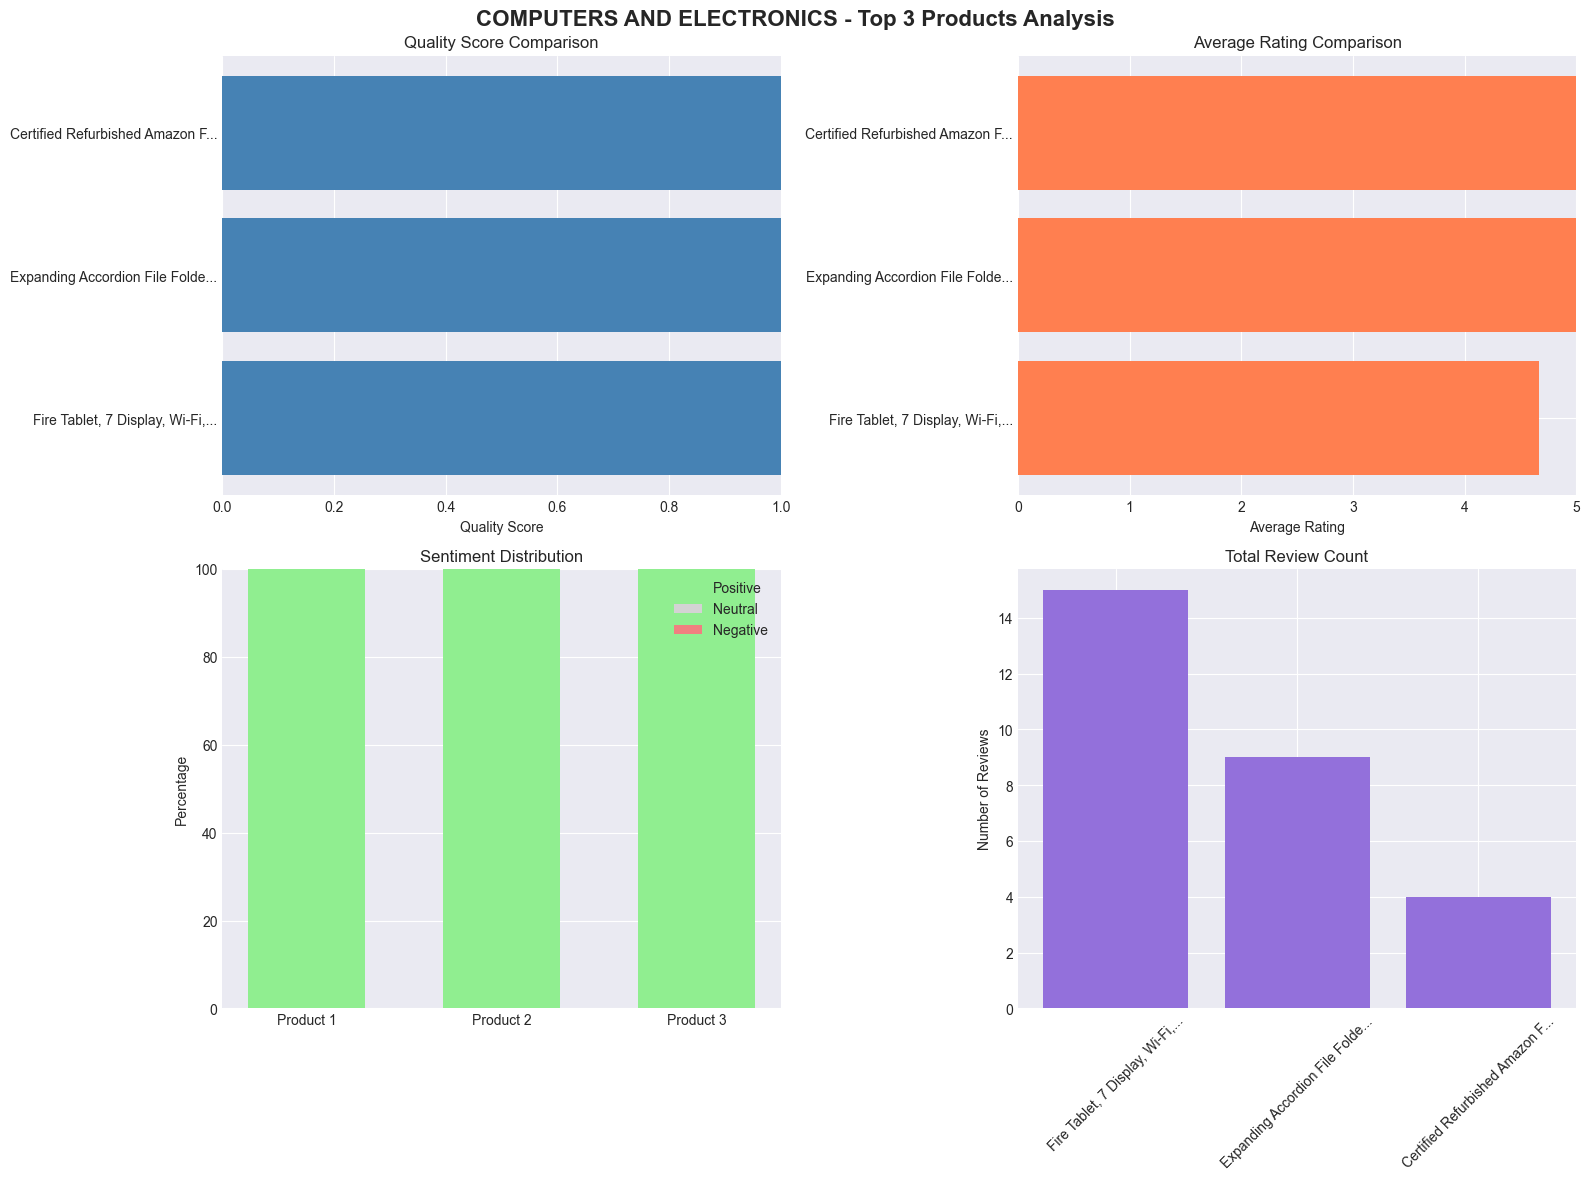

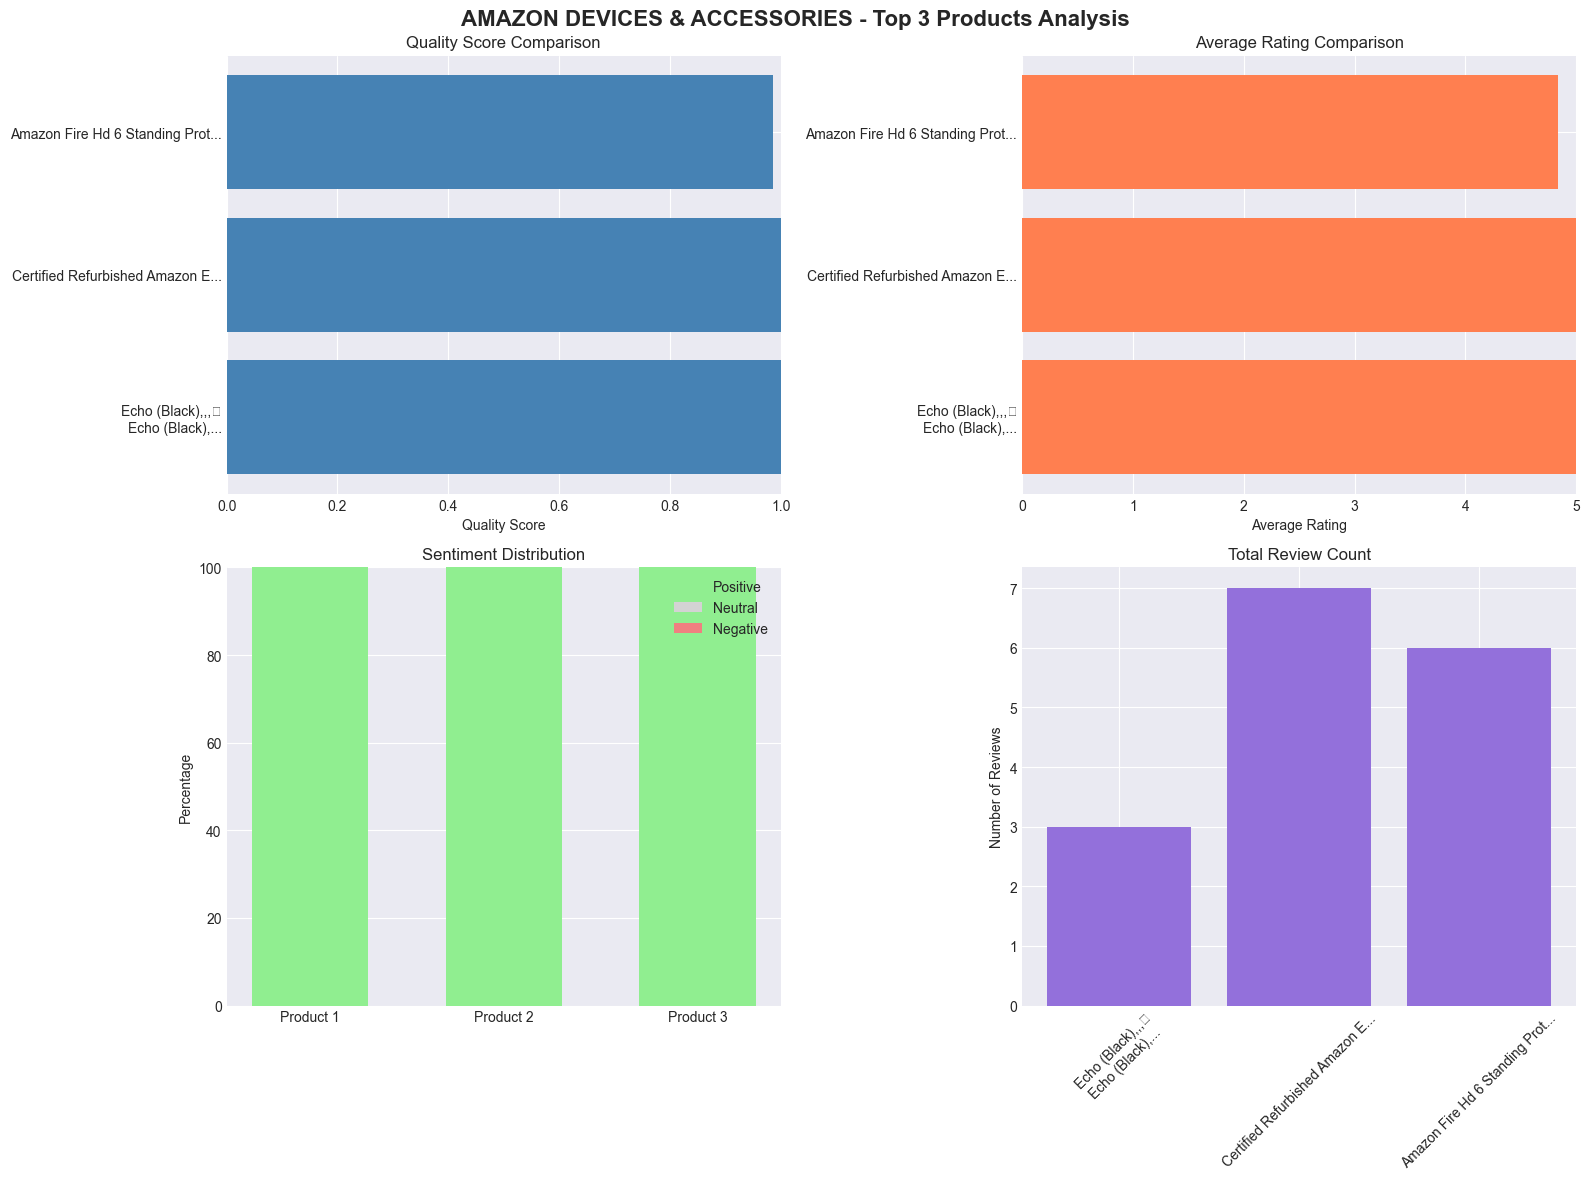

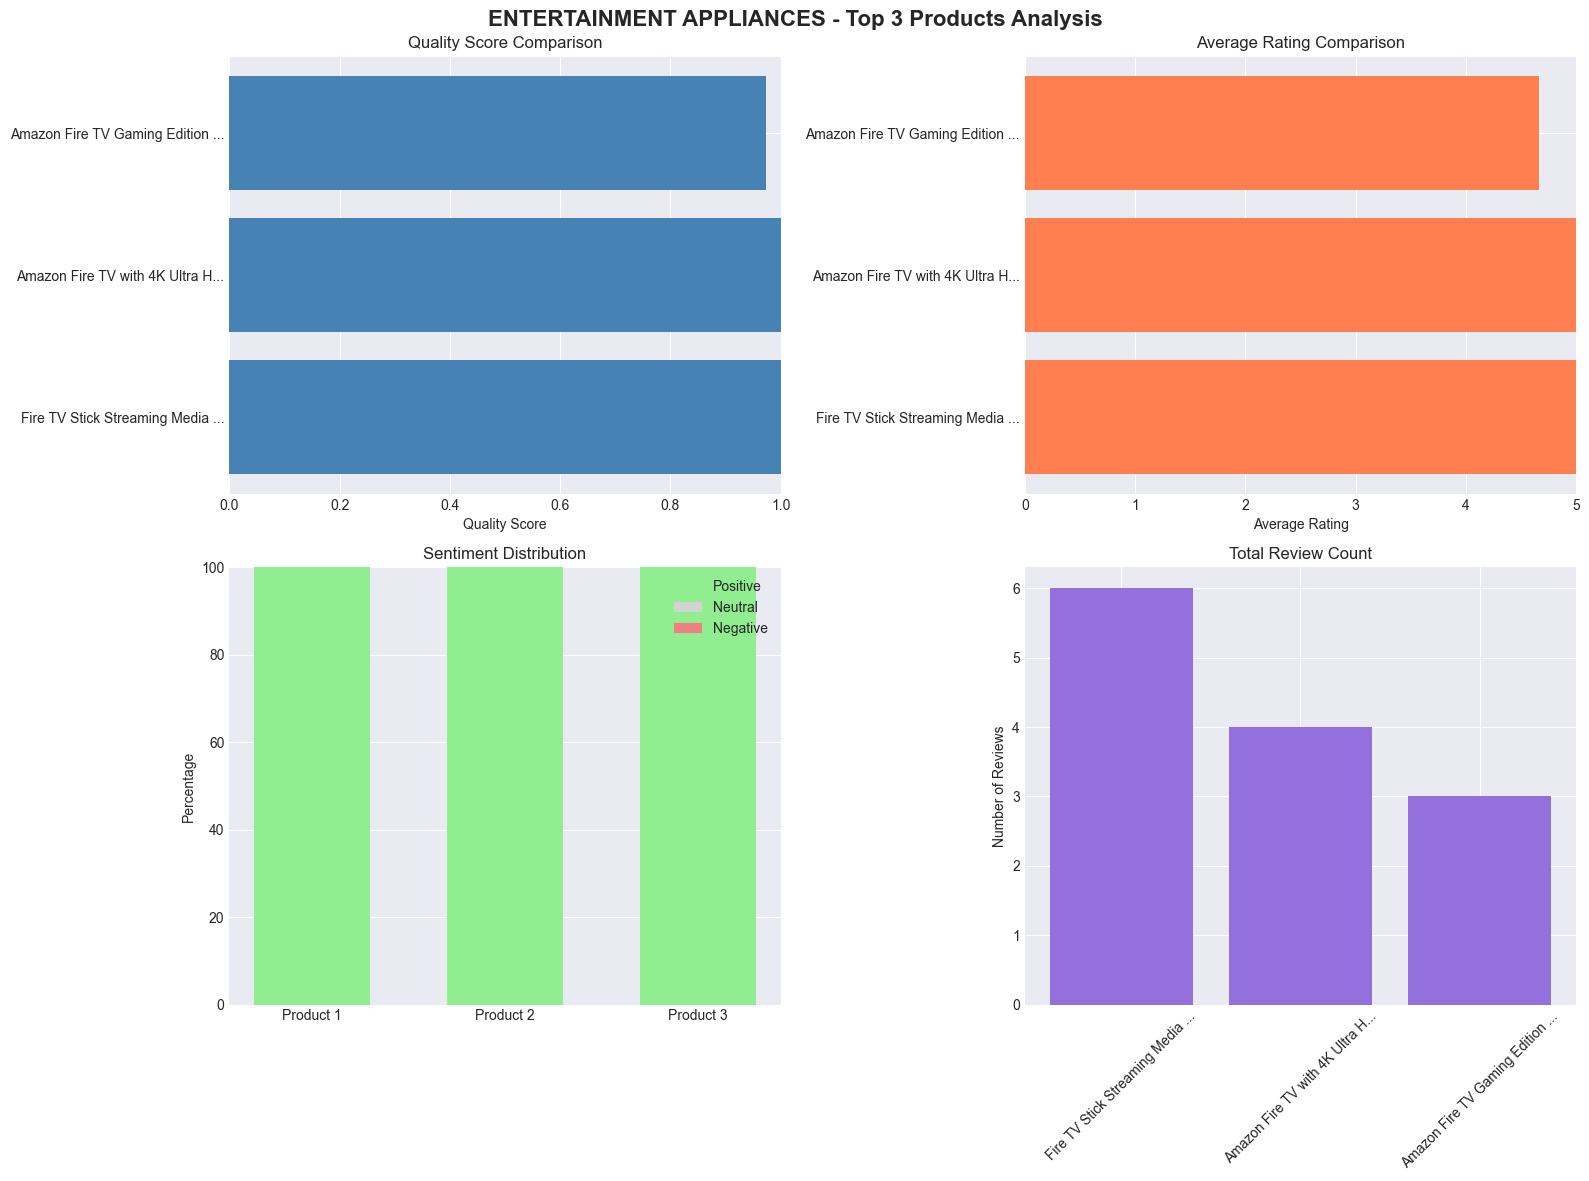

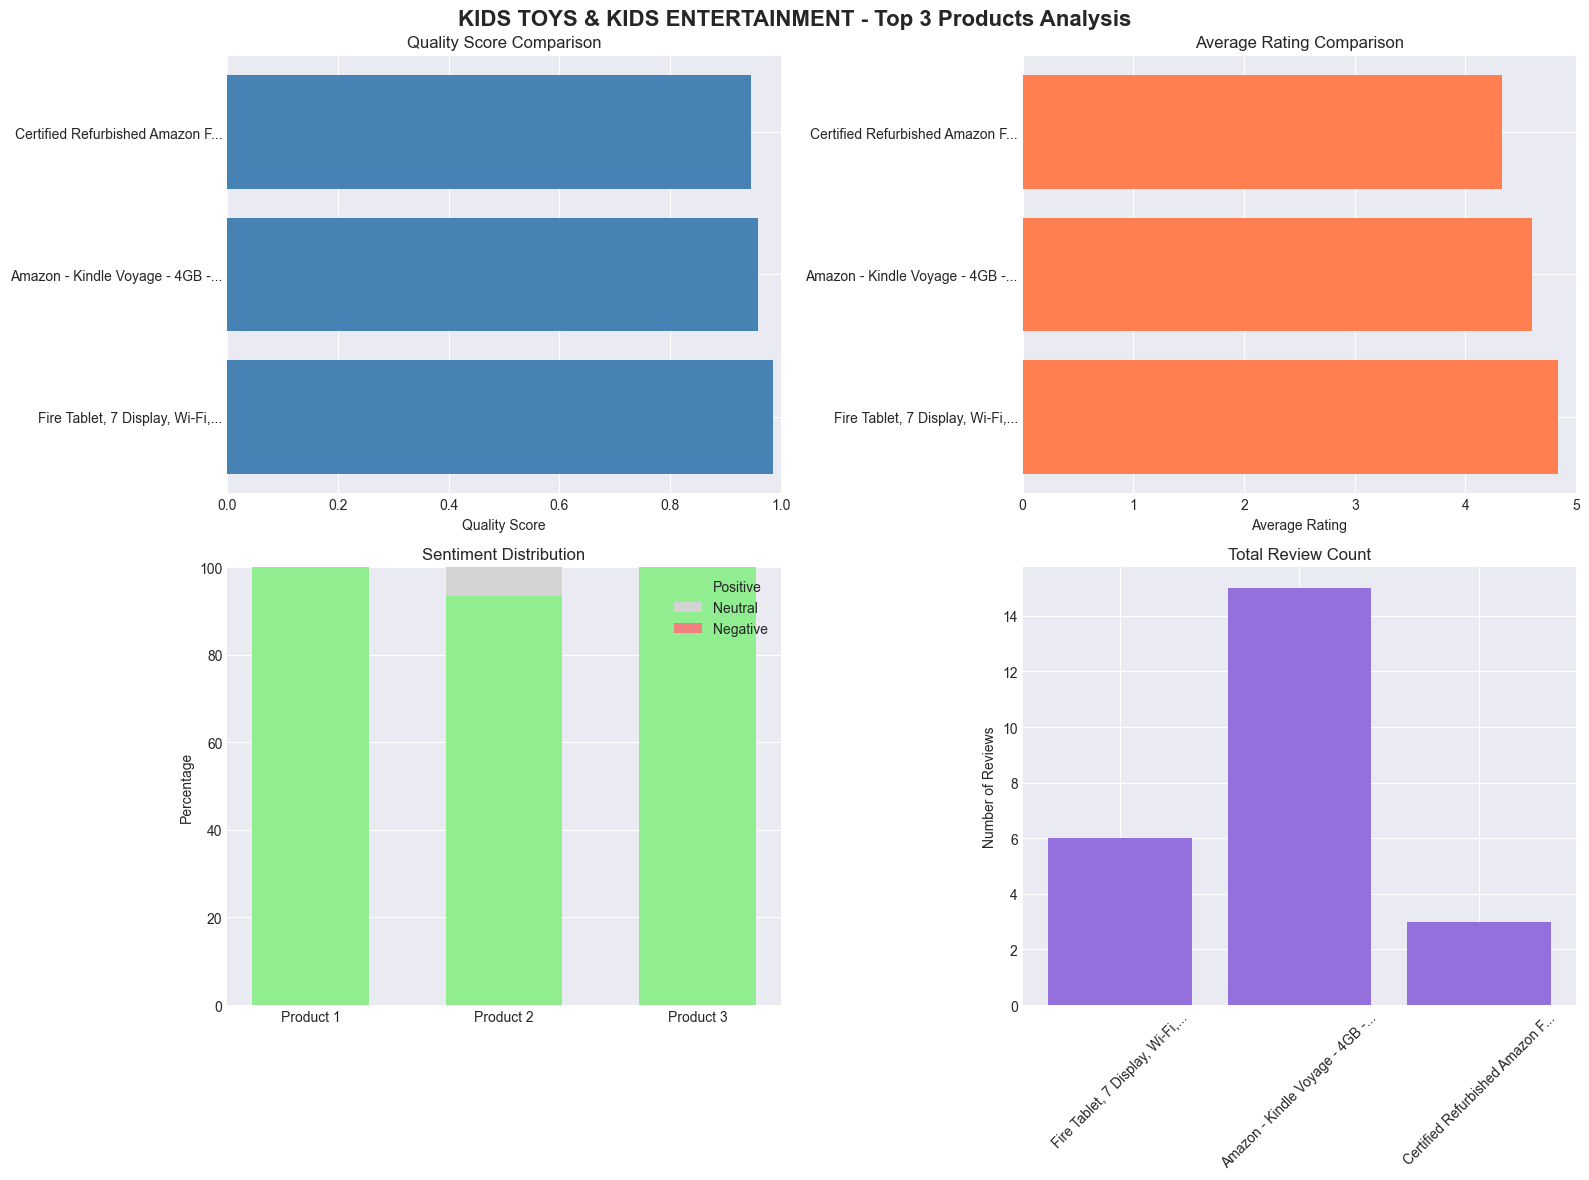

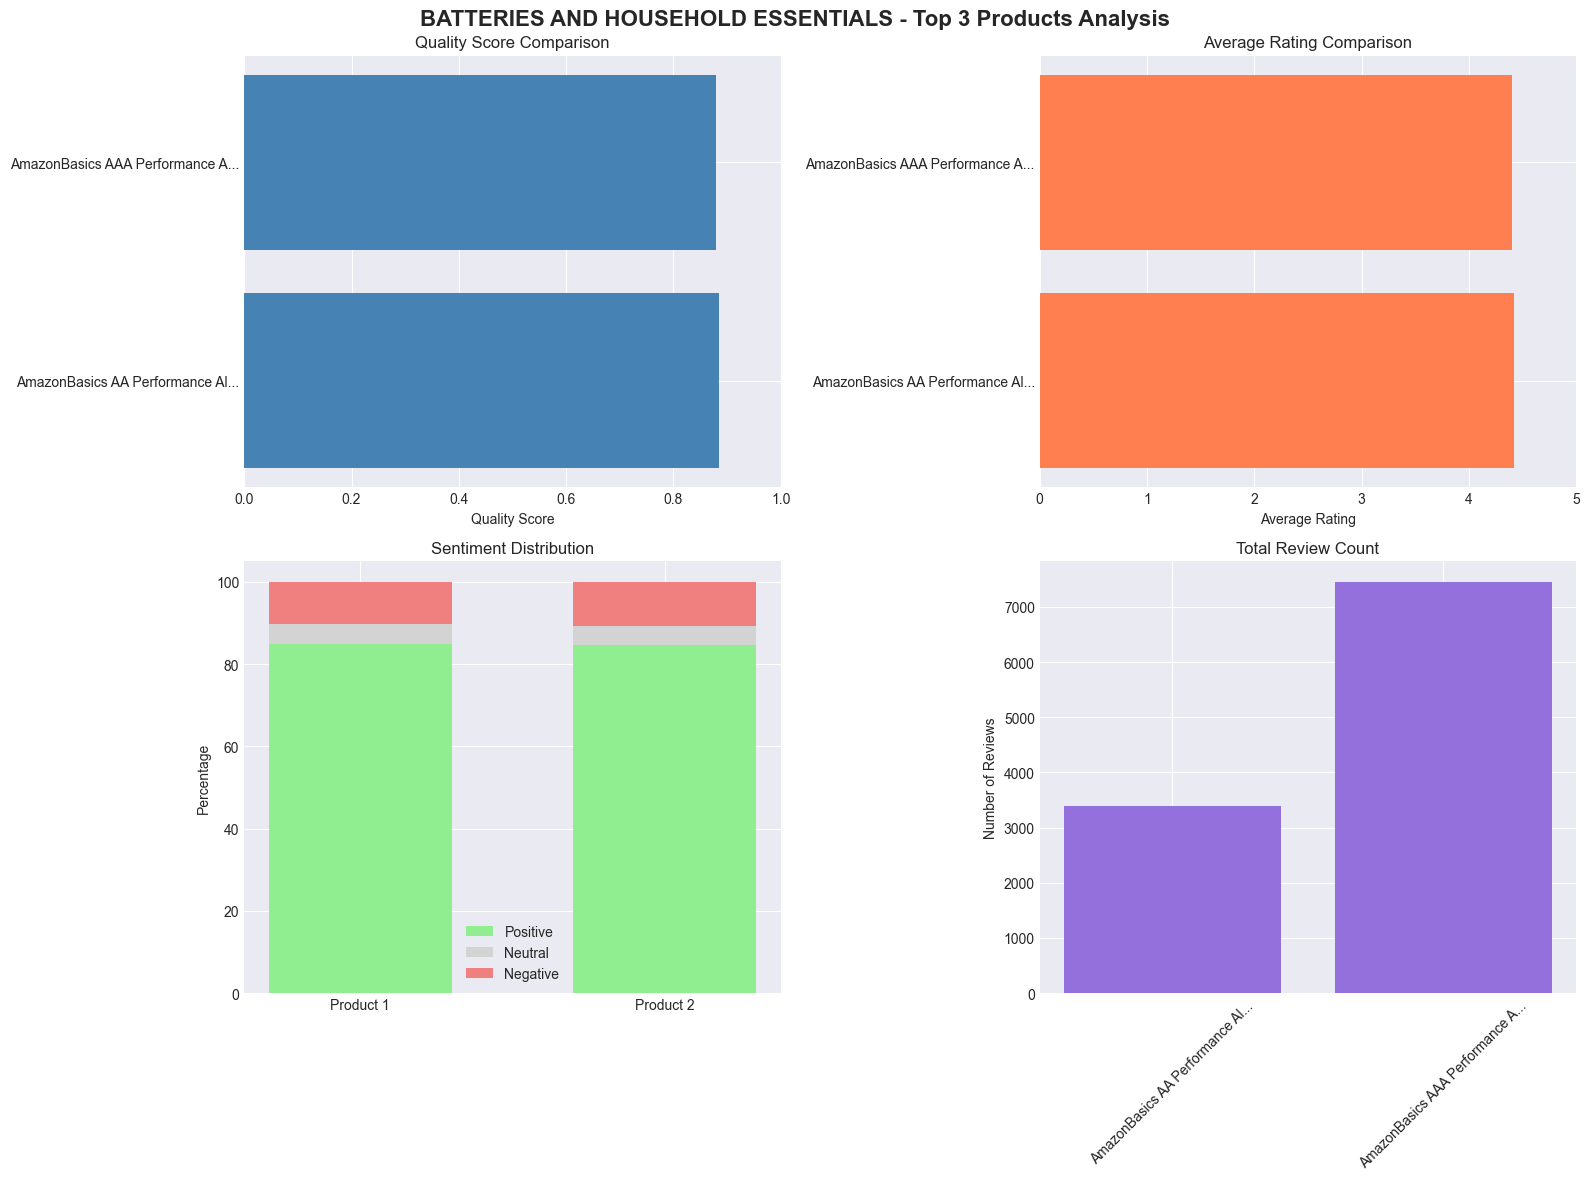

In [56]:
# Create visualizations for each category
categories = top_products_per_category['cluster_name'].unique()

for category in categories:
    category_data = top_products_per_category[top_products_per_category['cluster_name'] == category]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{category.upper()} - Top 3 Products Analysis', fontsize=16, fontweight='bold')
    
    # Truncate product names for better display
    category_data['short_name'] = category_data['name'].str[:30] + '...'
    
    # 1. Quality Scores
    axes[0, 0].barh(category_data['short_name'], category_data['quality_score'], color='steelblue')
    axes[0, 0].set_xlabel('Quality Score')
    axes[0, 0].set_title('Quality Score Comparison')
    axes[0, 0].set_xlim(0, 1)
    
    # 2. Average Ratings
    axes[0, 1].barh(category_data['short_name'], category_data['avg_rating'], color='coral')
    axes[0, 1].set_xlabel('Average Rating')
    axes[0, 1].set_title('Average Rating Comparison')
    axes[0, 1].set_xlim(0, 5)
    
    # 3. Sentiment Distribution
    sentiment_data = category_data[['positive_pct', 'neutral_pct', 'negative_pct']].values
    x = np.arange(len(category_data))
    width = 0.6
    
    axes[1, 0].bar(x, sentiment_data[:, 0], width, label='Positive', color='lightgreen')
    axes[1, 0].bar(x, sentiment_data[:, 1], width, bottom=sentiment_data[:, 0], 
                   label='Neutral', color='lightgray')
    axes[1, 0].bar(x, sentiment_data[:, 2], width, 
                   bottom=sentiment_data[:, 0] + sentiment_data[:, 1], 
                   label='Negative', color='lightcoral')
    
    axes[1, 0].set_ylabel('Percentage')
    axes[1, 0].set_title('Sentiment Distribution')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([f'Product {i+1}' for i in range(len(category_data))])
    axes[1, 0].legend()
    
    # 4. Review Count
    axes[1, 1].bar(category_data['short_name'], category_data['total_reviews'], color='mediumpurple')
    axes[1, 1].set_ylabel('Number of Reviews')
    axes[1, 1].set_title('Total Review Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 11. Export Results for Summarization Model

In [57]:
# Prepare data for the summarization model
# Create a structured dataset with all necessary information

summary_data = []

for category in top_products_per_category['cluster_name'].unique():
    category_top = top_products_per_category[top_products_per_category['cluster_name'] == category]
    category_worst = worst_products_per_category[worst_products_per_category['cluster_name'] == category]
    
    # Get top 3 products info
    top_3_products = []
    for idx, row in category_top.iterrows():
        # Get negative reviews for this product
        neg_reviews = merged_df[
            (merged_df['asins'] == row['asins']) & 
            (merged_df['predicted_sentiment'] == 'negative')
        ]['reviews.text'].tolist()[:5]  # Get top 5 negative reviews
        
        # Get positive reviews for context
        pos_reviews = merged_df[
            (merged_df['asins'] == row['asins']) & 
            (merged_df['predicted_sentiment'] == 'positive')
        ]['reviews.text'].tolist()[:5]  # Get top 5 positive reviews
        
        top_3_products.append({
            'name': row['name'],
            'asin': row['asins'],
            'quality_score': round(row['quality_score'], 3),
            'avg_rating': round(row['avg_rating'], 2),
            'total_reviews': int(row['total_reviews']),
            'positive_pct': round(row['positive_pct'], 1),
            'negative_pct': round(row['negative_pct'], 1),
            'neutral_pct': round(row['neutral_pct'], 1),
            'positive_reviews': pos_reviews,
            'negative_reviews': neg_reviews
        })
    
    # Get worst product info
    worst_product = None
    if len(category_worst) > 0:
        worst_row = category_worst.iloc[0]
        worst_neg_reviews = merged_df[
            (merged_df['asins'] == worst_row['asins']) & 
            (merged_df['predicted_sentiment'] == 'negative')
        ]['reviews.text'].tolist()[:5]
        
        worst_product = {
            'name': worst_row['name'],
            'asin': worst_row['asins'],
            'quality_score': round(worst_row['quality_score'], 3),
            'avg_rating': round(worst_row['avg_rating'], 2),
            'total_reviews': int(worst_row['total_reviews']),
            'negative_pct': round(worst_row['negative_pct'], 1),
            'negative_reviews': worst_neg_reviews
        }
    
    summary_data.append({
        'category': category,
        'top_3_products': top_3_products,
        'worst_product': worst_product
    })

print("✓ Summary data prepared for all categories")

✓ Summary data prepared for all categories


In [58]:
import json

# Create directory if it doesn't exist
os.makedirs('../datasets/processed', exist_ok=True)

with open('../datasets/processed/product_summary_data.json',
          'w',
          encoding='utf-8') as f:
    json.dump(summary_data, f, indent=2, ensure_ascii=False)

print("Summary data saved to '../datasets/processed/product_summary_data.json'")

Summary data saved to '../datasets/processed/product_summary_data.json'


In [59]:
# Drop unwanted column
product_stats_export = product_stats_filtered.drop(columns=['sentiments'])

# Save to target directory
product_stats_export.to_csv(
    '../datasets/processed/product_statistics.csv',
    index=False
)

print("✓ Product statistics saved to '../datasets/processed/product_statistics.csv'")

✓ Product statistics saved to '../datasets/processed/product_statistics.csv'


In [60]:
# Drop unwanted column
top_products_export = top_products_per_category.drop(columns=['sentiments'])

# Save to processed folder
top_products_export.to_csv(
    '../datasets/processed/top_3_products_per_category.csv',
    index=False
)

print("✓ Top 3 products per category saved to '../datasets/processed/top_3_products_per_category.csv'")

✓ Top 3 products per category saved to '../datasets/processed/top_3_products_per_category.csv'


In [65]:
# Drop unwanted column
worst_products_export = worst_products_per_category.drop(columns=['sentiments'])

# Save to processed folder
worst_products_export.to_csv(
    '../datasets/processed/worst_products_per_category.csv',
    index=False
)

print("Worst products per category saved to '../datasets/processed/worst_products_per_category.csv'")

Worst products per category saved to '../datasets/processed/worst_products_per_category.csv'
